In [13]:
#Importing Required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [18]:
#Reading telecommunication Dataset
df=pd.read_csv('teleCust1000t.csv')
#defining the independent variables array
#To use scikit-learn library we have to convert panda dataframe to numpy array
X = df[['tenure', 'age']] .values
#Defining the dependent and output variable 
y = df['custcat'].values

In [19]:
#Normalization of the data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-1.055125  ,  0.18450456],
       [-1.14880563, -0.69181243],
       [ 1.52109247,  0.82182601],
       [-0.11831864, -0.69181243],
       [-0.58672182, -0.93080797],
       [ 0.2564039 , -0.21382135],
       [ 0.44376517, -1.56812942],
       [ 0.11588295, -0.53248207],
       [ 0.44376517,  1.37948227],
       [ 1.52109247, -0.05449098]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [21]:
#Setting the nearest number of neighbors to evaluate
k=6
#Training and Predicting the model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#predicting The test set
yhat = neigh.predict(X_test)
yhat[0:10]

array([1, 1, 3, 1, 3, 2, 3, 1, 3, 2], dtype=int64)

In [22]:
#Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.495
Test set Accuracy:  0.295


In [23]:
#Choosing best K
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.28 , 0.315, 0.26 , 0.305, 0.28 , 0.295, 0.285, 0.315, 0.28 ,
       0.285, 0.325, 0.335, 0.345, 0.345, 0.345, 0.34 , 0.36 , 0.345,
       0.34 ])

In [24]:
k=16
#Training and Predicting the model
neigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
#predicting The test set
yhat = neigh.predict(X_test)

enter
exit


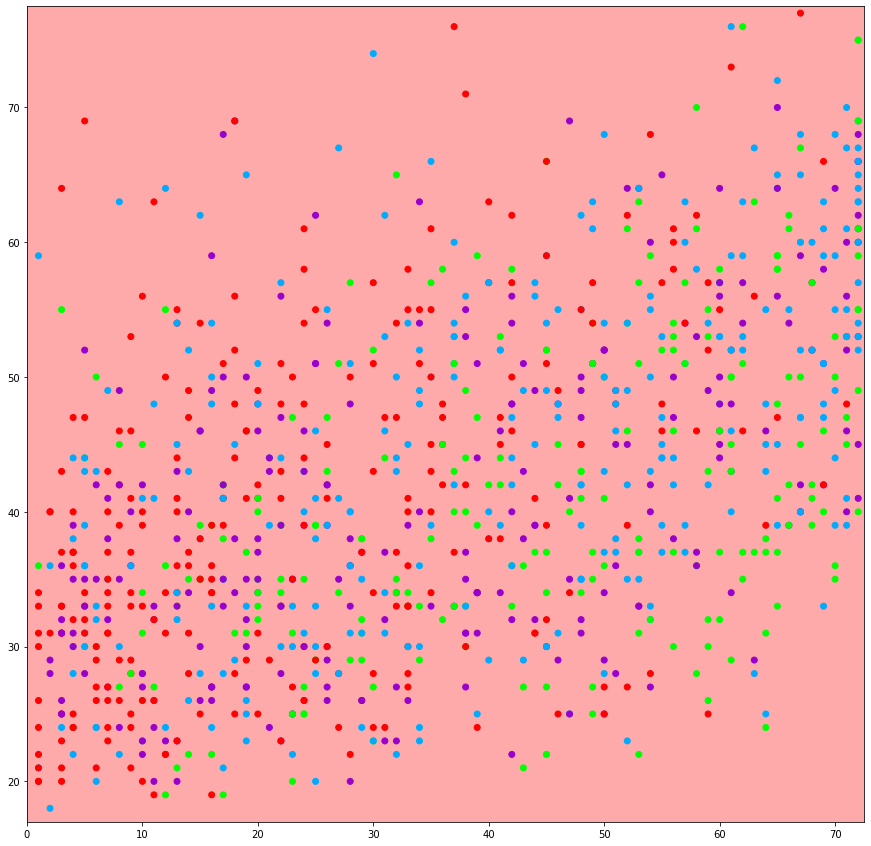

In [25]:
h=0.5
cmap_light = clr.ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF','#FF0099'])
cmap_bold = clr.ListedColormap(['#FF0000', '#00FF00','#00AAFF','#9900CC'])
l_min,l_max=df.tenure.min()-1,df.tenure.max()+1
w_min,w_max=df.age.min()-1,df.age.max()+1
lrange=np.arange(l_min,l_max,h)
wrange=np.arange(w_min,w_max,h)
ll,ww=np.meshgrid(lrange,wrange)
#print('enter')
Z=neigh.predict(np.c_[ll.ravel(),ww.ravel()])
#print('exit')
Z=Z.reshape(ll.shape)
plt.figure(figsize=(15,15))
plt.pcolormesh(ll,ww,Z,cmap=cmap_light)
plt.scatter(df.tenure,df.age,c=y,cmap=cmap_bold)
plt.xlim(ll.min(),ll.max())
plt.ylim(ww.min(),ww.max())
plt.show()